In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import pandas as pd
import numpy as np
import var as var
import sys
import re

sys.path.insert(1, './script/')
import censo as scINEP
import ibge as scIBGE
import caged as scCAGED

In [2]:
dataFrameINEP = pd.read_csv(f'./result/INEP.csv')
dataFrameCAGED = pd.read_csv(f'./result/CAGED.csv')
dataFrameIBGE = pd.read_csv(f'./result/IBGE.csv')

In [3]:
dataFrameINEP[var.CAGED_COLUMNS] = dataFrameCAGED[var.CAGED_COLUMNS]
dataFrameINEP[var.IBGE_COLUMNS] = dataFrameIBGE[var.IBGE_COLUMNS]

dataFrameINEPPublico = dataFrameINEP[dataFrameINEP['C_TP_REDE'] == 1]
dataFrameINEPPrivado = dataFrameINEP[dataFrameINEP['C_TP_REDE'] == 2]

In [4]:
idhm =  pd.read_csv(f'./data/ibge/idh/data.csv', sep=';')
idhm['Município'] = idhm['Município'].apply(lambda x: re.sub(r'\s\(\w+\)', '', x))

validIdhm = idhm[idhm['Município'].isin(dataFrameINEP['NO_MUNICIPIO'].unique())]

def returnGroupedData(dataFrame):
    data = []

    for ano in dataFrame['ANO'].unique().tolist():
        dataAno = dataFrame[dataFrame['ANO'] == ano]

        for idx, municipio in enumerate(dataAno['NO_MUNICIPIO'].unique().tolist()):
            dataMunicipio = dataAno[dataAno['NO_MUNICIPIO'] == municipio]
            data.append([ano, municipio] + dataMunicipio[var.INEP_COLUMNS].sum().to_list() + dataMunicipio[var.CAGED_COLUMNS].mean().to_list() + dataMunicipio[var.IBGE_COLUMNS].mean().to_list())

    return pd.DataFrame(data, columns=['ANO', 'NO_MUNICIPIO'] + var.INEP_COLUMNS + var.CAGED_COLUMNS + var.IBGE_COLUMNS)  

def retornaValorDummies(valor):
    valor = abs(valor)
    if valor >= 0 and valor <= 0.199: return 0.2
    elif valor >= 0.2 and valor <= 0.3999: return 0.4
    elif valor >= 0.4 and valor <= 0.6999: return 0.6
    elif valor >= 0.7 and valor <= 0.8999: return 0.8
    elif valor >= 0.9 and valor <= 1: return 1

def showHeatMap(dataFrame, columns):
    dataFrame = dataFrame[columns]
    corr = dataFrame.corr(method='spearman')
    corr = corr.apply(lambda x: x.apply(lambda y: retornaValorDummies(y)))

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    labels = []
    for idx, col in enumerate(columns):
        labels.append(var.LABELS[col])

    plt.figure(figsize=(50, 30))
    sns.set(font_scale=3)
    sns.set_style("white")
    plt.title(f'Correlação das váriáveis')

    perfect_patch = mpatches.Patch(color='#b40426', label='Muito Forte')
    very_strong_patch = mpatches.Patch(color='#d65244', label='Forte')
    strong_patch = mpatches.Patch(color='#ee8468', label='Moderada')
    medium_patch = mpatches.Patch(color='#f7ac8e', label='Fraca')
    yeak_patch = mpatches.Patch(color='#f2cbb7', label='Muito Fraca')
    plt.legend(handles=[perfect_patch, very_strong_patch, strong_patch, medium_patch, yeak_patch])
    
    sns.heatmap(corr, xticklabels=labels, cmap='coolwarm', yticklabels=labels, annot=False, mask=mask, robust=True, fmt='.2f', vmin=-1, vmax=1, cbar=False, linewidths=1, square=True)
    plt.savefig(f'./result/Heatmap variáveis brasil.png')

In [5]:
dataGrouped = returnGroupedData(dataFrameINEP)

In [6]:
dataGroupedYear = dataGrouped.drop(columns=['NO_MUNICIPIO']).groupby(['ANO']).sum().reset_index()
dataGroupedYear

,ANO,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,...,CAGED_MUNICIPIO_SALARIO,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA
0,2009,62869.0,21066.0,8373.0,46816.0,46816.0,0.0,82715.0,5340.0,0.0,...,192505.839317,4663.583778,4841.237996,7235.205739,413.991052,-7433.0,7433.0,1.926789e+09,76689208.0,3856.152110
1,2010,61430.0,20844.0,7221.0,42572.0,42572.0,0.0,86770.0,9174.0,1386.0,...,199915.382775,4657.658245,4890.445309,7307.429301,391.990947,-19620.0,19620.0,0.000000e+00,0.0,0.000000
2,2011,63606.0,20421.0,6977.0,42520.0,42520.0,0.0,111380.0,8636.0,1562.0,...,223222.170579,4605.596545,4786.909956,7127.191558,409.581964,-12705.0,12705.0,2.481570e+09,77158151.0,4973.296535
3,2012,60670.0,21940.0,7920.0,42252.0,42252.0,0.0,117702.0,11400.0,1696.0,...,248142.067686,4955.958157,5072.527140,7661.173111,398.942231,-9895.0,9895.0,2.741662e+09,79036146.0,5580.234767
4,2013,59669.0,22158.0,6821.0,51868.0,51868.0,0.0,135352.0,10657.0,1186.0,...,275630.326569,5059.054777,5253.993414,7799.518737,406.534405,-8161.0,8161.0,3.002694e+09,82275230.0,5991.569043
5,2014,61615.0,24227.0,6301.0,42581.0,55564.0,162494.0,174494.0,12542.0,1296.0,...,303176.655566,5286.191619,5375.805666,7995.750926,418.752287,-10321.0,10321.0,3.236968e+09,83921649.0,6474.025103
6,2015,62202.0,22589.0,5810.0,43963.0,61187.0,161824.0,168606.0,13179.0,1200.0,...,328174.230430,5330.625793,5582.595198,7948.918163,416.464759,-1204.0,1204.0,3.330299e+09,84666533.0,6506.948005
7,2016,62114.0,22930.0,6427.0,45462.0,61472.0,145346.0,151499.0,11443.0,1298.0,...,328294.992759,5219.761107,5656.042169,7671.992090,373.062492,4977.0,-4977.0,3.444017e+09,85043675.0,6607.145015
8,2017,63377.0,22931.0,6270.0,43734.0,62320.0,147242.0,156459.0,11682.0,1178.0,...,360895.707558,5365.758188,5624.191128,7874.399415,385.160841,-5220.0,5220.0,3.574793e+09,85842669.0,6892.211185
9,2018,63955.0,23164.0,6625.0,45713.0,60953.0,130139.0,137612.0,11479.0,1972.0,...,365781.924884,5270.538322,5645.519508,7622.242103,383.419208,-20188.0,20188.0,3.764360e+09,85825381.0,7276.516489


In [7]:
inep = [
    'INEP_CURSO_QUANTIDADE_MATRICULADOS',
    'INEP_CURSO_QUANTIDADE_INGRESSANTES',
    'INEP_CURSO_QUANTIDADE_CONCLUINTES',
    'INEP_CURSO_QUANTIDADE_VAGAS_NOVAS',
    'INEP_CURSO_QUANTIDADE_VAGAS_TOTAL',
    'INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS',
    'INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL',
    'INEP_CURSO_QUANTIDADE_ALUNOS_DEFICIENTES',
    'INEP_CURSO_EVASAO',
    'INEP_CURSO_PERMANENCIA',
    'INEP_CURSO_QUANTIDADE_VETERANOS',
    'INEP_CURSO_CONCORRENCIA_VAGAS',
    'INEP_CURSO_DIFERENCA_VAGAS_ANO_ANTERIOR',
    'INEP_IES_QUANTIDADE_ALUNOS_DEFICIENTES',
    'INEP_IES_QUANTIDADE_DOCENTES_EXERCICIO'
]

caged = [
    'CAGED_MUNICIPIO_ADMISSOES',
    'CAGED_MUNICIPIO_DESLIGAMENTOS',
    'CAGED_MUNICIPIO_SALARIO',
    'CAGED_MUNICIPIO_ADMISSOES_IDADE',
    'CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE',
    'CAGED_MUNICIPIO_SALARIO_MINIMO',
    'CAGED_MUNICIPIO_SALDO',
]

ibge = [
    'IBGE_MUNICIPIO_PIB',
    'IBGE_MUNICIPIO_POP',
    'IBGE_MUNICIPIO_PIBPERCAPTA',
]

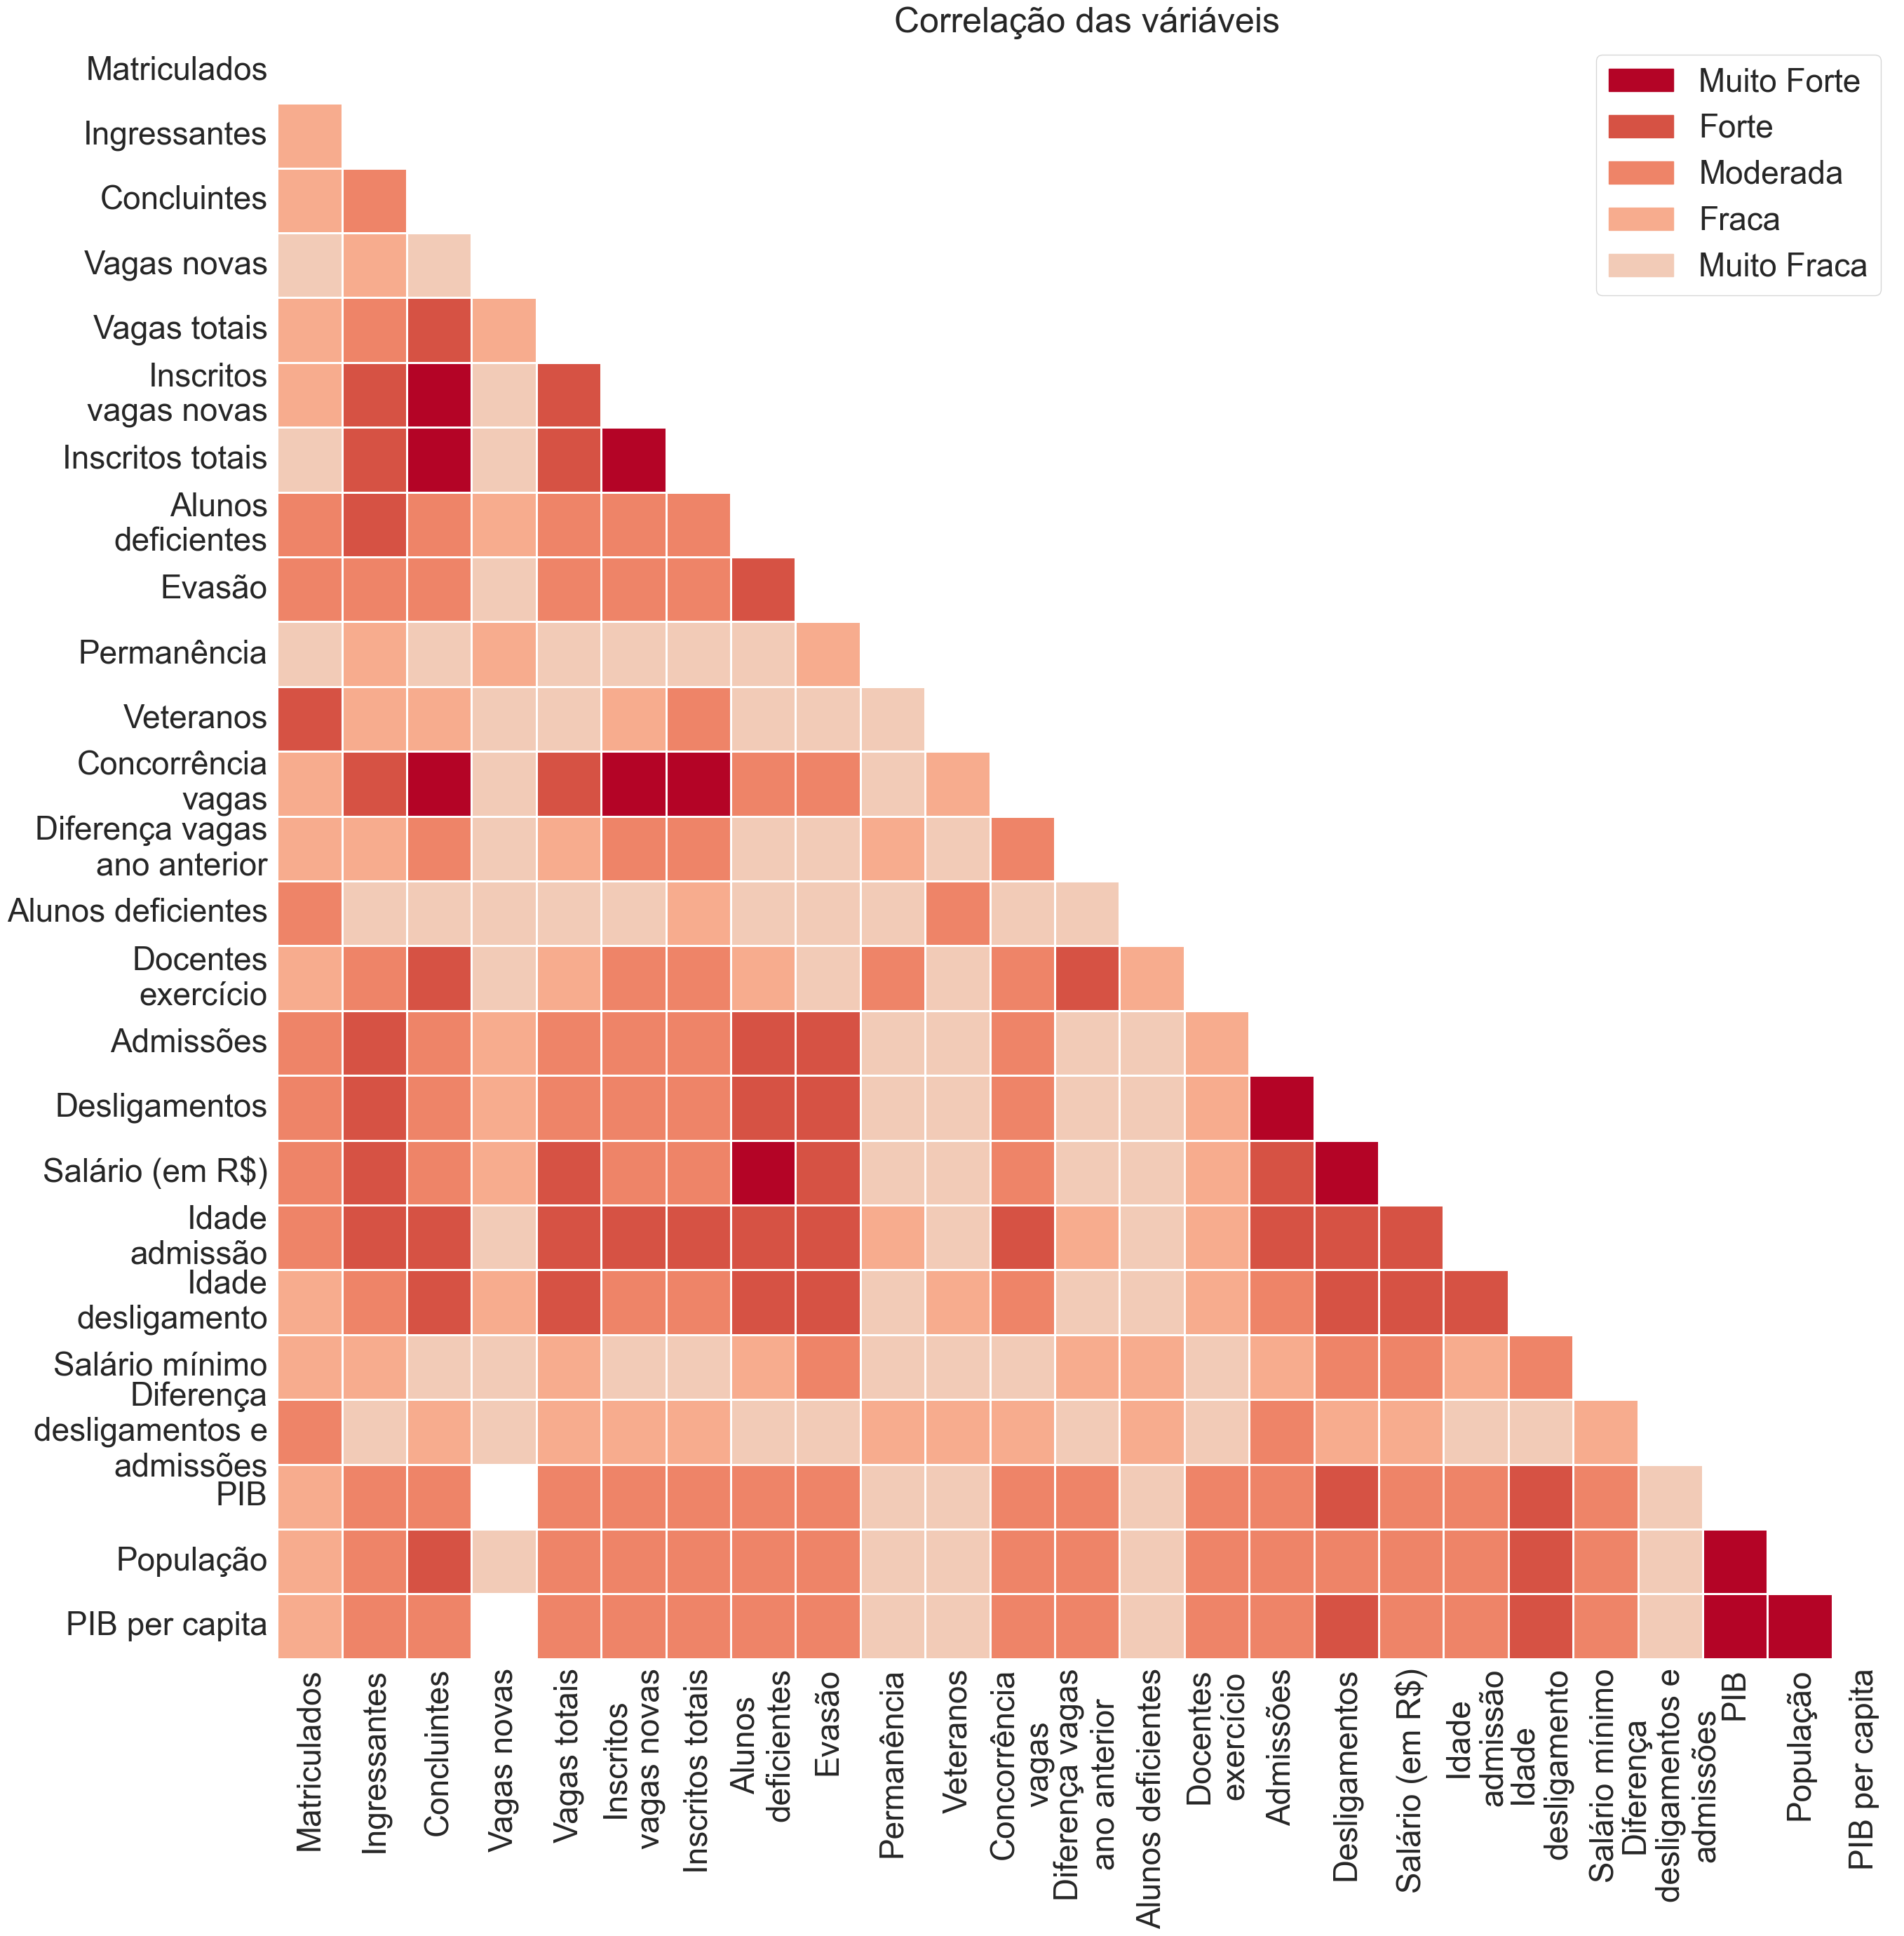

In [8]:
showHeatMap(dataGroupedYear, inep + caged + ibge)

In [9]:
dataGroupedYear.corr(method='spearman')

,ANO,INEP_CURSO_QUANTIDADE_MATRICULADOS,INEP_CURSO_QUANTIDADE_INGRESSANTES,INEP_CURSO_QUANTIDADE_CONCLUINTES,INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,...,CAGED_MUNICIPIO_SALARIO,CAGED_MUNICIPIO_ADMISSOES_IDADE,CAGED_MUNICIPIO_DESLIGAMENTOS_IDADE,CAGED_MUNICIPIO_HORA_CONTRATO,CAGED_MUNICIPIO_SALARIO_MINIMO,CAGED_MUNICIPIO_SALDO,CAGED_MUNICIPIO_DIFERENCA_ADMISSAO,IBGE_MUNICIPIO_PIB,IBGE_MUNICIPIO_POP,IBGE_MUNICIPIO_PIBPERCAPTA
ANO,1.000000,0.615385,0.818182,-0.650350,0.251748,0.720280,0.594593,0.636364,0.720280,-0.195804,...,1.000000,0.867133,0.811189,0.377622,-0.524476,-0.209790,0.209790,0.567426,0.560421,0.567426
INEP_CURSO_QUANTIDADE_MATRICULADOS,0.615385,1.000000,0.398601,-0.265734,0.139860,0.363636,0.217534,0.125874,0.195804,-0.293706,...,0.615385,0.489510,0.314685,-0.244755,-0.335664,-0.419580,0.419580,0.294221,0.280211,0.294221
INEP_CURSO_QUANTIDADE_INGRESSANTES,0.818182,0.398601,1.000000,-0.678322,0.223776,0.594406,0.739616,0.762238,0.713287,-0.265734,...,0.818182,0.860140,0.692308,0.608392,-0.223776,-0.195804,0.195804,0.560421,0.553416,0.560421
INEP_CURSO_QUANTIDADE_CONCLUINTES,-0.650350,-0.265734,-0.678322,1.000000,-0.020979,-0.804196,-0.906392,-0.944056,-0.720280,0.132867,...,-0.650350,-0.790210,-0.720280,-0.797203,0.090909,-0.223776,0.223776,-0.690019,-0.718040,-0.690019
INEP_CURSO_QUANTIDADE_VAGAS_NOVAS,0.251748,0.139860,0.223776,-0.020979,1.000000,0.398601,-0.014502,-0.020979,-0.027972,-0.454545,...,0.251748,0.188811,0.342657,0.034965,-0.181818,0.125874,-0.125874,0.199650,0.164624,0.199650
INEP_CURSO_QUANTIDADE_VAGAS_TOTAL,0.720280,0.363636,0.594406,-0.804196,0.398601,1.000000,0.768621,0.734266,0.657343,-0.258741,...,0.720280,0.734266,0.888112,0.524476,-0.398601,0.335664,-0.335664,0.619966,0.640982,0.619966
INEP_CURSO_QUANTIDADE_INSCRITOS_VAGAS_NOVAS,0.594593,0.217534,0.739616,-0.906392,-0.014502,0.768621,1.000000,0.957150,0.826630,-0.203032,...,0.594593,0.746867,0.659854,0.739616,0.029005,0.304548,-0.304548,0.483046,0.512101,0.483046
INEP_CURSO_QUANTIDADE_INSCRITOS_TOTAL,0.636364,0.125874,0.762238,-0.944056,-0.020979,0.734266,0.957150,1.000000,0.811189,-0.118881,...,0.636364,0.776224,0.699301,0.860140,-0.013986,0.293706,-0.293706,0.605955,0.633976,0.605955
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANCADA,0.720280,0.195804,0.713287,-0.720280,-0.027972,0.657343,0.826630,0.811189,1.000000,-0.069930,...,0.720280,0.727273,0.622378,0.601399,0.000000,0.111888,-0.111888,0.276708,0.283713,0.276708
INEP_CURSO_QUANTIDADE_ALUNOS_SITUACAO_TRANSFERIDO,-0.195804,-0.293706,-0.265734,0.132867,-0.454545,-0.258741,-0.203032,-0.118881,-0.069930,1.000000,...,-0.195804,-0.454545,0.000000,-0.132867,-0.118881,-0.237762,0.237762,0.101576,0.045534,0.101576
